#Prediction whether a mammogram mass is benign or malignant 
###  we'ill be using the mammographic "masses" public dataset from the UCI repository (source: http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/)
### This data contains 961 instance detected in mammograms and contains the following attributes
### 1. BI-RADs assesment 1 to 5 (ordinal)
### 2. Age: patient's age in years (integer)
### 3. Shape: mass shape round=1, oval=2, lobular=3, irregular=4 (nominal)
### 4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
### 5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
### 6. Severity: benign=0 or malignant=1 (binominal)

## BI-RADS is an assesment  of how confident the severity classification is: it is not a "predictive" atttribute and so we will discard it. The age, shape, margin and density attributes are the features that we will build our model with and "severity" is the classification we will attempt to predict based on those attributes 

#### Although "shape" and "margin" are nominal data types which sklearn typically doesn't deal with how well they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular 

#### A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results if we can build a better way to interpret them through supervised machine learning it could improve alot of lives 

## machine learning techniques used in this project
#### Different supervised machine learning techniques to this dataset and see which one yields the highest accuracy as measured with K-fold across validation(k=10)
#### .Decision tree
#### .Random forest
#### .KNN
#### .Naive Bayes
#### .SVM
#### .Neural network using Keras
#### .Other supervise learning techniques that is not mentioned here 
### The data used needs to be cleaned, many rows containing missing data and there may be erroneous data identifiable as outliers as well 
### Techniques like SVM require the input data to be Normalized first and some other techniques used to need hyperparameters tunning that need to be tunned to give best accuracy score 
 

In [1]:
import pandas as pd

masses_data = pd.read_csv("/content/drive/MyDrive/Benign or Malignant detection in Mammogram/mammographic_masses.data")
masses_data.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


## Using of optional parameters in read_csv to convert missing data(indicated by a ?) into NaN, and to add the apropriate column names(BI_RADS, age, shape, margin, density and density 

In [2]:
masses_data = pd.read_csv("/content/drive/MyDrive/Benign or Malignant detection in Mammogram/mammographic_masses.data", na_values=["?"], names=["BI_RADS", "age", "shape","margin","density","severity"])
masses_data.head()

,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


## Evaluating whether the data needs cleaning 

In [3]:
masses_data.describe()

,BI_RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


## There are quite a few missing values in the data set Below i just drop every row that's missing data, I need to be sure i don't bias the data in doing so. Does there appear to be any sort of correlation to what sort of data has missing fields? if there were, I'd have to try and go back and fill that data in

In [9]:
masses_data.loc[(masses_data["BI_RADS"].isnull()|
                 masses_data["age"].isnull())|
                 masses_data["shape"].isnull()|
                 masses_data["margin"].isnull()|
                 masses_data["density"].isnull()|
                 masses_data["severity"].isnull()] 

,BI_RADS,age,shape,margin,density,severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
778,4.0,60.0,NaN,4.0,3.0,0
819,4.0,35.0,3.0,NaN,2.0,0
824,6.0,40.0,NaN,3.0,4.0,1
884,5.0,NaN,4.0,4.0,3.0,1


#### The missing data seems randomly distributed, the next is to drop rows with missing, data 

In [10]:
masses_data.dropna(inplace=True)
masses_data.describe()

,BI_RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


## Now i need to convert the pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data, i want to work with(age, shape, margin and density) and another array that contains the classes(severity). I'll also need an arrary of the feature name labels 

In [11]:
all_features = masses_data[["age", "shape", "margin", "density"]].values

all_classes = masses_data["severity"].values

feature_name = ["age", "shape", "margin", "density"]

all_features

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

### Some of the models that will be used require the input data to be normalized, so i need to normalize the attribute data by using preprocessing StandardScaler on the input data

In [12]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

# Decision Trees
## Before moving to K-Fold cross validation and random forests, am starting with train test split of the dataset. Set aside 75% for training and 25% for testing

In [13]:
import numpy 
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

(training_inputs, 
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)
 

## Now i need to create a DecisionTreeClassifier and fit it to the training data

In [14]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1)

#Train the classifier on the training set

clf.fit(training_inputs, training_classes) 

DecisionTreeClassifier(random_state=1)

## Desplay the resulting decision tree

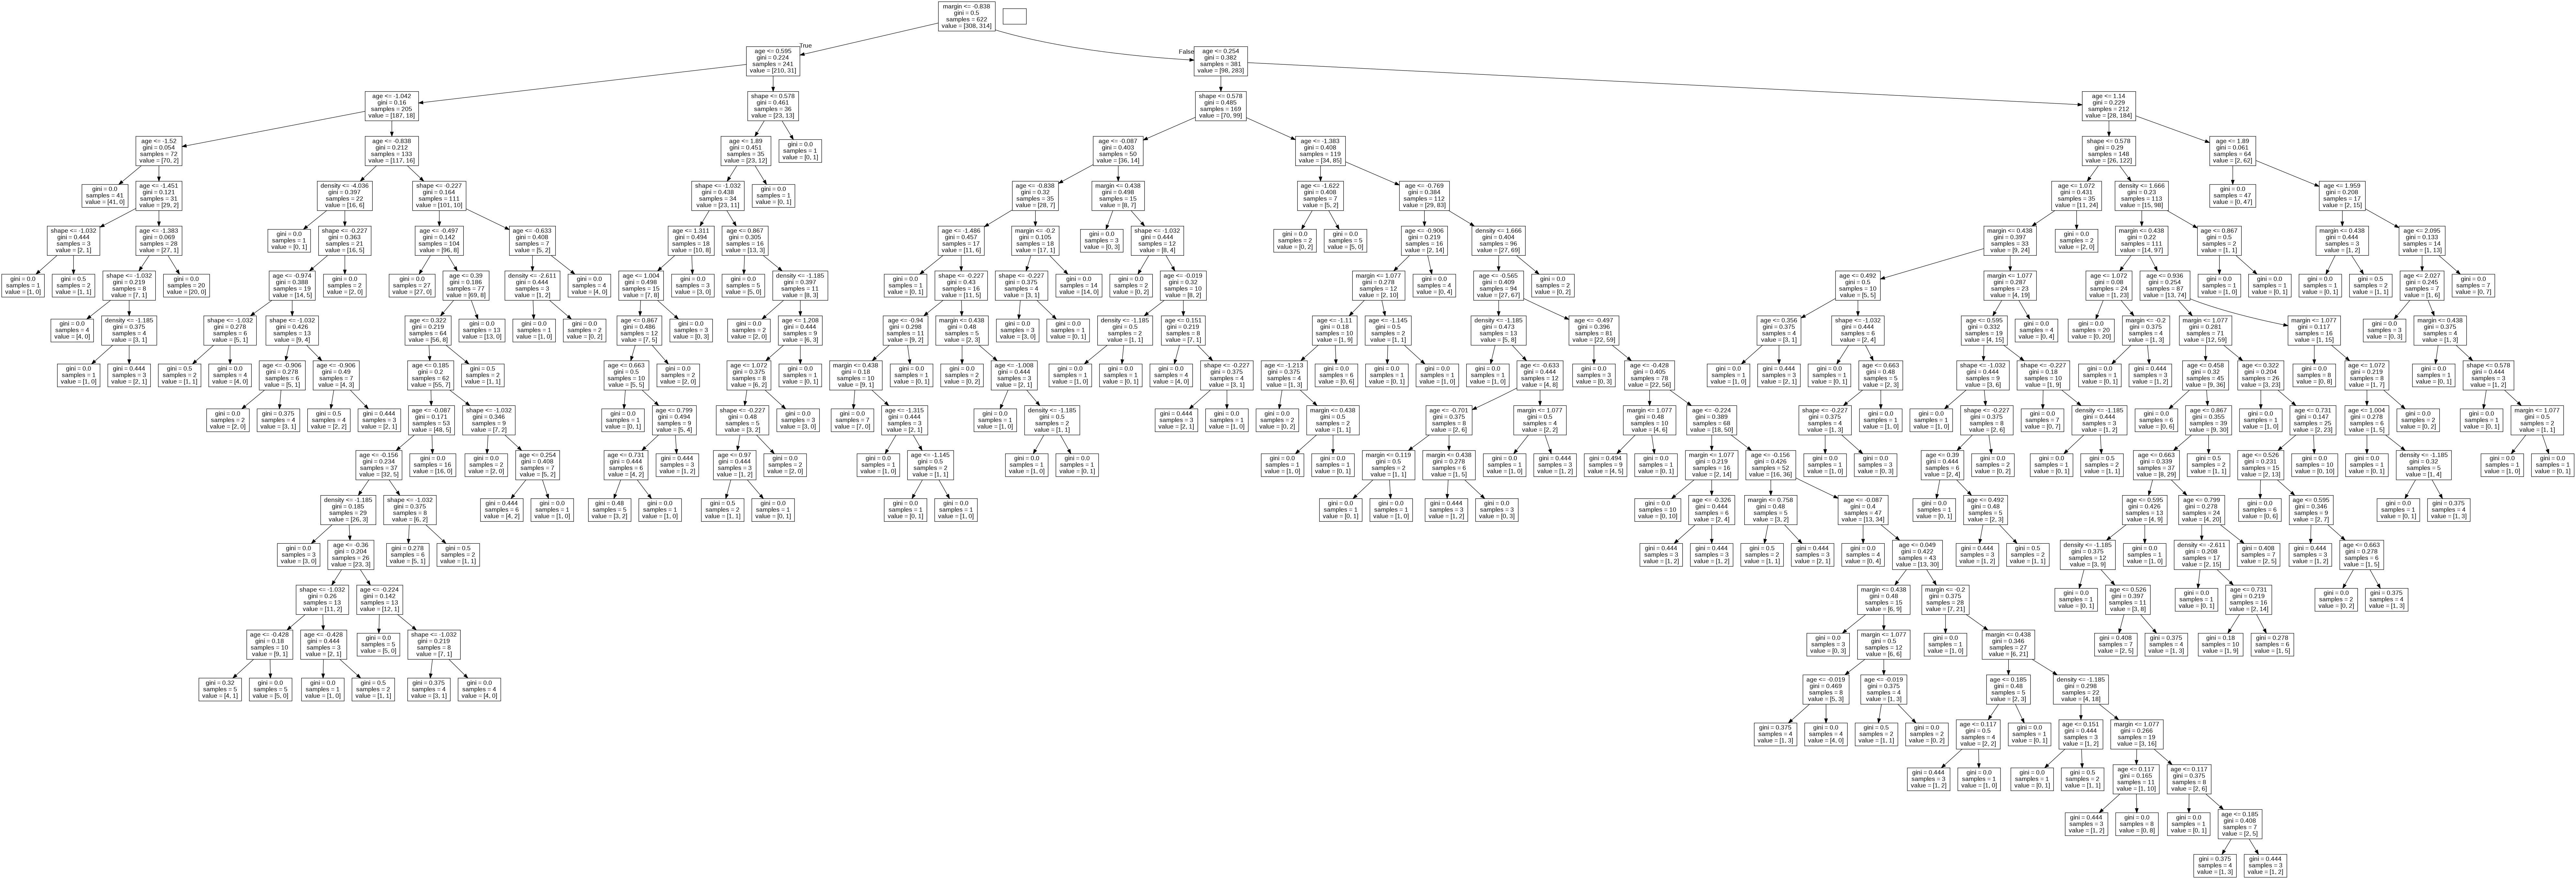

In [20]:
from six import StringIO
from IPython.display import Image
from sklearn import tree
from pydotplus import graph_from_dot_data

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=feature_name)

graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Accuracy measure of Decision tree model using the test data 

In [21]:
clf.score(testing_inputs, testing_classes)

0.7355769230769231

## Instead of a single train test split, am using k-fold cross validation to get a better measure of the test data

In [22]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7373493975903613

## Now its time to try a RandomForestClassifier instead. To know if it will perform better than Decision Tree

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7421686746987952

# SVM
### Next model is SVC with linear kernel. How does it compare to the decision tree?

In [27]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel="linear", C=C)

In [28]:
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.7975903614457832

# KNN
### Trying to use K-Nearest-Neighbors, if it will perform better than SVM 

In [29]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7927710843373494

## Choosing K is tricky, so i can't discard KNN untill i've tried different values of K. i need to write a for loop to run KNN with K values ranging from 1 to 50 and see if K makes a substantial difference. Make a note of the best performance i could get out of KNN 

In [30]:
for n in range(1, 50):
  clf = neighbors.KNeighborsClassifier(n_neighbors=n)
  cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
  print(n, cv_scores.mean())

1 0.7216867469879519
2 0.689156626506024
3 0.7566265060240964
4 0.7337349397590361
5 0.7746987951807228
6 0.7698795180722892
7 0.7987951807228916
8 0.7746987951807229
9 0.7891566265060241
10 0.7927710843373494
11 0.7915662650602411
12 0.7819277108433735
13 0.7891566265060241
14 0.7879518072289157
15 0.7855421686746988
16 0.7807228915662651
17 0.7783132530120482
18 0.7795180722891566
19 0.7843373493975904
20 0.7843373493975904
21 0.7879518072289156
22 0.7843373493975904
23 0.7795180722891566
24 0.7783132530120482
25 0.7831325301204819
26 0.7855421686746988
27 0.7855421686746988
28 0.789156626506024
29 0.7867469879518072
30 0.791566265060241
31 0.7879518072289157
32 0.7903614457831325
33 0.7903614457831325
34 0.7843373493975903
35 0.7855421686746987
36 0.7879518072289156
37 0.7831325301204819
38 0.7867469879518072
39 0.7831325301204819
40 0.7831325301204819
41 0.780722891566265
42 0.7831325301204819
43 0.7819277108433734
44 0.7819277108433734
45 0.7831325301204819
46 0.7843373493975904
4

# Naive Bayes
### Now i want to try naive_bayes MultinomialNB to know if it perform better than KNN

In [31]:
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
all_features_minMax = scaler.fit_transform(all_features)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, all_features_minMax, all_classes, cv=10)

cv_scores.mean()

0.7855421686746988

# Revisiting SVM

### svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparameter" am going to try "rbf" , "sigmoid", " poly kernels" and see what the best performing kernel is

In [32]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel="rbf", C=C)

cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.8012048192771084

In [33]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel="sigmoid", C=C)

cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.7457831325301204

In [34]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel="poly", C=C)

cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.7903614457831326

## rbf kernel seem to work better so far

#Logistic Regression 
### I've tried all these fancy techniques, but fundamentally this is another classification problem. Let see if it will work better than the rest 

In [35]:
from sklearn.linear_model  import LogisticRegression 

clf = LogisticRegression()
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.8072289156626505

# LinearDiscriminantAnalysis
### Trying to check if LinearDiscriminantAnalysis will work better than the already used techniques

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.8024096385542169

# Neural Networks
### Its time to try artificial neural network maybe it can do even better than the already applied techniques

In [41]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model():
  model = Sequential()
  # 4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
  model.add(Dense(6, input_dim=4, kernel_initializer="normal", activation="relu"))
  model.add(Dense(1, kernel_initializer="normal", activation="sigmoid"))
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model


In [42]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Wrap our cross model in the estimator compile with scikit_learn

estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
#Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """


0.8

# Perceptron
### Trying if perceptron techniques will work better 

In [46]:
from sklearn.linear_model import Perceptron

pre = Perceptron()
cv_scores = cross_val_score(pre, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7433734939759036

# Multi-level perceptron
### Trying perceptron to see maybe it will work better than others techniques 

In [50]:
y = masses_data["severity"]
x = masses_data.drop(["severity"], axis=1)

In [52]:
#split the data
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=.25, random_state=25)

In [53]:
scaler = preprocessing.StandardScaler()
# Fit only to the training data
#scaler.fit(x_train)


In [55]:
scaler.fit(x_train)
scaler.fit(x_test)

StandardScaler()

In [56]:
# Now apply the transformations to the data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test) #scale the input(indepent) and output(dependent) variables to [0, 1]

In [57]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [58]:
mlp.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [59]:
y_pred = mlp.predict(x_test) # predict benign and malignant

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[100,  13],
       [ 19,  76]])

In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8461538461538461


In [64]:
mlp.score(x_test, y_test)

0.8461538461538461

In [72]:
import pickle

file = "/content/drive/MyDrive/Benign or Malignant detection in Mammogram/pickle_model/model_pickle"

with open(file, "wb") as f:
  pickle.dump(mlp, f)


In [75]:
with open(file, "rb") as f:
  l = pickle.load(f)

In [76]:
l.predict(x_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1])